# Description

    Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. Here we have prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Using this datas we need to build a model and predict the price of ticket. It is a regression problem

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_excel(r"C:\Users\USER\AppData\Local\Temp\Temp1_Flight_Ticket_Participant_Datasets-20190305T100527Z-001.zip\Flight_Ticket_Participant_Datasets\Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-30 05:50:00,2021-05-30 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-30 18:05:00,2021-05-30 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-30 16:50:00,2021-05-30 21:35:00,4h 45m,1 stop,No info,13302


This is our train dataset

In [3]:
test = pd.read_excel(r"C:\Users\USER\AppData\Local\Temp\Temp1_Flight_Ticket_Participant_Datasets-20190305T100527Z-001.zip\Flight_Ticket_Participant_Datasets\Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,2021-05-30 17:30:00,2021-06-07 04:25:00,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,2021-05-30 06:20:00,2021-05-30 10:20:00,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-05-30 19:15:00,2021-05-22 19:00:00,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,2021-05-30 08:00:00,2021-05-30 21:00:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,2021-05-30 23:55:00,2021-06-25 02:45:00,2h 50m,non-stop,No info


This is our test dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


Most of the columns have object types

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Here we can see that two column have missing value

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Route            2671 non-null   object        
 5   Dep_Time         2671 non-null   datetime64[ns]
 6   Arrival_Time     2671 non-null   datetime64[ns]
 7   Duration         2671 non-null   object        
 8   Total_Stops      2671 non-null   object        
 9   Additional_Info  2671 non-null   object        
dtypes: datetime64[ns](3), object(7)
memory usage: 208.8+ KB


In [7]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no missing value in the test dataset

In [8]:
data["Price"].max()

79512

Maximum price is 79512

In [9]:
data[data['Price']==79512]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,2021-05-30 05:45:00,2021-05-30 11:25:00,5h 40m,1 stop,Business class,79512


Highest price charged by jet airways airline

In [10]:
data["day_time"] = np.where((data["Dep_Time"].dt.hour>=0)&(data["Dep_Time"].dt.hour<=2),"Late Night",
                            np.where((data["Dep_Time"].dt.hour>=3)&(data["Dep_Time"].dt.hour<=7),"Early Morning",
                            np.where((data["Dep_Time"].dt.hour>=8)&(data["Dep_Time"].dt.hour<=11),"Morning",
                            np.where((data["Dep_Time"].dt.hour>=12)&(data["Dep_Time"].dt.hour<=16),"Afternoon",
                            np.where((data["Dep_Time"].dt.hour>=17)&(data["Dep_Time"].dt.hour<=19),"Evening","Night")))))

Here I chenged the time start from source column into period of a day like morning using dt.hour

In [11]:
test["day_time"] = np.where((test["Dep_Time"].dt.hour>=0)&(test["Dep_Time"].dt.hour<=2),"Late Night",
                            np.where((test["Dep_Time"].dt.hour>=3)&(test["Dep_Time"].dt.hour<=7),"Early Morning",
                            np.where((test["Dep_Time"].dt.hour>=8)&(test["Dep_Time"].dt.hour<=11),"Morning",
                            np.where((test["Dep_Time"].dt.hour>=12)&(test["Dep_Time"].dt.hour<=16),"Afternoon",
                            np.where((test["Dep_Time"].dt.hour>=17)&(test["Dep_Time"].dt.hour<=19),"Evening","Night")))))

Also done same thing as test dataset

In [12]:
data["day_time"].value_counts()

Morning          2729
Early Morning    2377
Afternoon        1909
Evening          1706
Night            1691
Late Night        271
Name: day_time, dtype: int64

after changing the datas it's look like that

In [13]:
test["day_time"].value_counts()

Morning          686
Early Morning    578
Afternoon        516
Night            435
Evening          404
Late Night        52
Name: day_time, dtype: int64

In [14]:
for i in data.columns:
    if data[i].dtype == "object":
        print(data[i].value_counts())
        print()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ..

Using the above function we can extract the features

In [15]:
for i in test.columns:
    if test[i].dtype == "object":
        print(test[i].value_counts())
        print()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BOM → IXC → DEL → HYD            1
BOM → AMD → ISK → HYD

In [16]:
data["Airline"].replace("Jet Airways Business","Jet Airways",inplace =True)
data["Airline"].replace("Vistara Premium economy","Vistara",inplace = True)
data["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

For the simplicity for understanding the model replace the similer data in a same column

In [17]:
test["Airline"].replace("Jet Airways Business","Jet Airways",inplace =True)
test["Airline"].replace("Vistara Premium economy","Vistara",inplace = True)
test["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

Here also done same thing as we done previous column

In [18]:
data["Destination"].replace("New Delhi","Delhi",inplace=True)
test["Destination"].replace("New Delhi","Delhi",inplace=True)

In [19]:
duration = data["Arrival_Time"] - data["Dep_Time"]
duration_list=[]
for i in range(len(duration)):
    fun = duration.iloc[i].seconds/3600
    duration_list.append(fun)
data["Duration"]=duration_list    

In [20]:
dura= test["Arrival_Time"] - test["Dep_Time"]
dura_list=[]
for i in range(len(dura)):
    func = dura.iloc[i].seconds/3600
    dura_list.append(func)
test["Duration"]=dura_list   

In [21]:
data["Additional_Info"].replace("No Info","No info",inplace=True)
data["Additional_Info"].replace("2 Long layover","1 Long layover",inplace=True)
data["Additional_Info"].replace("1 Long layover","3 Long layover",inplace=True)

In [22]:
test["Additional_Info"].replace("1 Long layover","3 Long layover",inplace=True)

In [23]:
data=data.drop(columns=["Route","Dep_Time","Arrival_Time"],axis=1)

In [24]:
test=test.drop(columns=["Route","Dep_Time","Arrival_Time"],axis=1)

In [25]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_time
0,IndiGo,2019-03-24,Banglore,Delhi,2.833333,non-stop,No info,3897,Night
1,Air India,2019-01-05,Kolkata,Banglore,7.416667,2 stops,No info,7662,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,19.000000,2 stops,No info,13882,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,5.416667,1 stop,No info,6218,Evening
4,IndiGo,2019-01-03,Banglore,Delhi,4.750000,1 stop,No info,13302,Afternoon


In [26]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
day_time           0
dtype: int64

Now we can see a nan value in Totalstop column

In [27]:
data[data["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_time
9039,Air India,2019-06-05,Delhi,Cochin,23.666667,NaN,No info,7480,Morning


In [28]:
data["Total_Stops"]=data["Total_Stops"].fillna("1 stop")

fill the nan value with 1 stop

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Duration         10683 non-null  float64       
 5   Total_Stops      10683 non-null  object        
 6   Additional_Info  10683 non-null  object        
 7   Price            10683 non-null  int64         
 8   day_time         10683 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 751.3+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2671 non-null   object        
 1   Date_of_Journey  2671 non-null   datetime64[ns]
 2   Source           2671 non-null   object        
 3   Destination      2671 non-null   object        
 4   Duration         2671 non-null   float64       
 5   Total_Stops      2671 non-null   object        
 6   Additional_Info  2671 non-null   object        
 7   day_time         2671 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 167.1+ KB


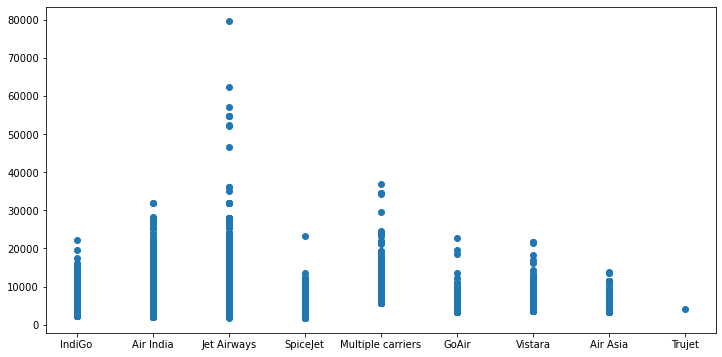

In [31]:
plt.figure(figsize=(12,6))
plt.scatter(data["Airline"],data["Price"])

Highest price charged by jet airways and most least one is trujet

In [32]:
data["Price"].min()

1759

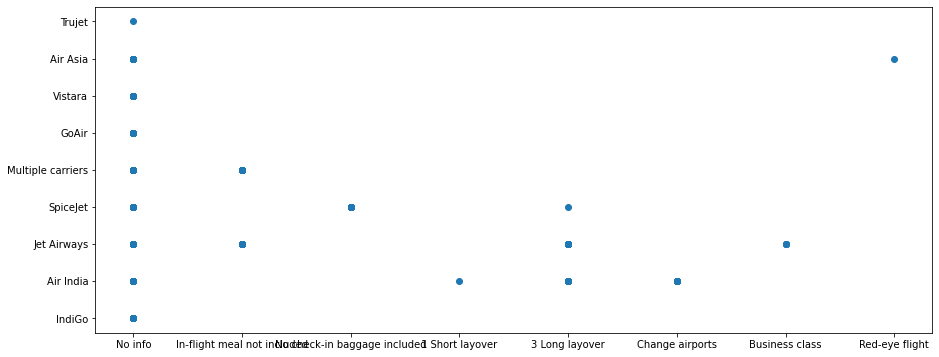

In [33]:
plt.figure(figsize=(15,6))
plt.scatter(data["Additional_Info"],data["Airline"])

jet airways and multiple carriers not included meals in thier ticket price

<AxesSubplot:xlabel='day_time', ylabel='Price'>

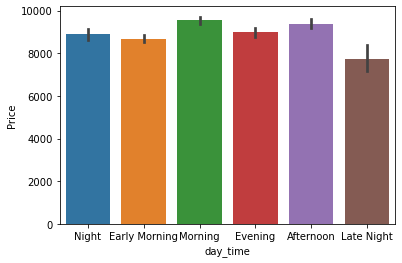

In [34]:
sns.barplot(x="day_time",y="Price",data=data)

Highest price charged for morning flight.

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration'>

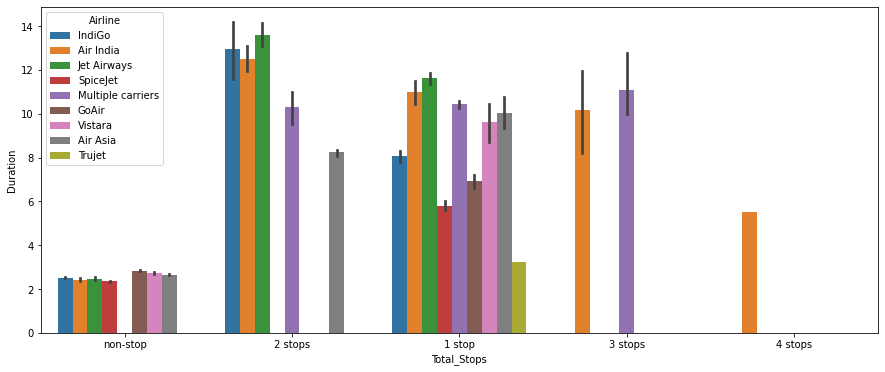

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(x="Total_Stops",y="Duration",data=data,hue="Airline")

All the airline have 1 stop 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

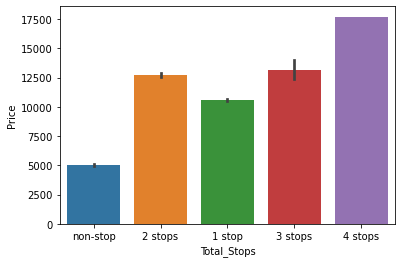

In [36]:
sns.barplot(x="Total_Stops",y="Price",data=data)

Increase the number of stops also increase the price

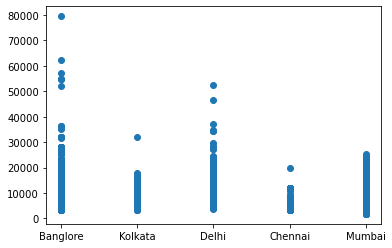

In [37]:
plt.scatter(data["Source"],data["Price"])

Highest price charged by Banglore starting point

<AxesSubplot:>

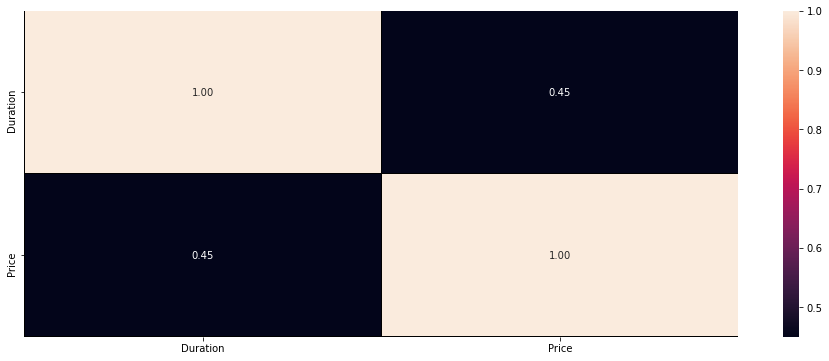

In [38]:
plt.figure(figsize =(16,6))
sns.heatmap(data.corr(),annot=True,linewidths = 0.5,linecolor="black",fmt = '.2f')

Price and Duration are equaly correlated with each other.They are not highly correlated.

# Encoding

In [39]:
data_cate = ["Airline","Source","Destination","Total_Stops","Additional_Info","day_time"]
test_cate = ["Airline","Source","Destination","Total_Stops","Additional_Info","day_time"]
label = LabelEncoder()
for col in data_cate:
    data[col] = label.fit_transform(data[col])

converting the string type data into numeric

In [40]:
for col in test_cate:
    test[col] = label.fit_transform(test[col])

In [41]:
data.shape

(10683, 9)

In [42]:
test.shape

(2671, 8)

In [43]:
data = data.drop("Date_of_Journey",axis=1)
test = test.drop("Date_of_Journey",axis =1)

In [44]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,day_time
0,3,0,2,2.833333,4,6,3897,5
1,1,3,0,7.416667,1,6,7662,1
2,4,2,1,19.000000,1,6,13882,4


# data spliting

In [45]:
x = data.drop('Price',axis = 1)

y = data['Price']

In [46]:
scale = StandardScaler()

x = scale.fit_transform(x)

In [47]:
max_r_score=0
for r_state in range(40,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  40  is:  0.32869298846876627
r2_score corresponding to random state:  41  is:  0.3354457280127896
r2_score corresponding to random state:  42  is:  0.35503457252677595
r2_score corresponding to random state:  43  is:  0.3409612548230093
r2_score corresponding to random state:  44  is:  0.36603615748519713
r2_score corresponding to random state:  45  is:  0.3233397412815151
r2_score corresponding to random state:  46  is:  0.38672387653911977
r2_score corresponding to random state:  47  is:  0.39597959973673647
r2_score corresponding to random state:  48  is:  0.32794568692688897
r2_score corresponding to random state:  49  is:  0.3647082293436211
r2_score corresponding to random state:  50  is:  0.3780501126258453
r2_score corresponding to random state:  51  is:  0.372235644381695
r2_score corresponding to random state:  52  is:  0.3780251954971897
r2_score corresponding to random state:  53  is:  0.3463865124148291
r2_score corresponding to ran

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 41,test_size=0.20)

In [73]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    r2 = r2_score(y_test,pred)
    print("r2 score is:",r2)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))

In [74]:
eval(KNeighborsRegressor())

r2 score is: 0.6604643171277638
RMSE: 2698.6687723946043


r2 score is 0.66 lets try to improve it

In [75]:
kn = KNeighborsRegressor()

params = {'n_neighbors':np.arange(0,8),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','brute']}
cv = KFold ( n_splits = 5,shuffle = False ,random_state = None)

gcv = GridSearchCV(kn,params,cv=cv)


In [76]:
gcv .fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7]),
                         'weights': ['uniform', 'distance']})

In [77]:
gcv.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'uniform'}

In [54]:
kn_new=KNeighborsRegressor(algorithm ='auto',n_neighbors = 5, weights = 'uniform')
kn_new.fit(x_train,y_train)
pred=kn_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.7101667924761665
2580.201047061431


In [79]:
eval(DecisionTreeRegressor())

r2 score is: 0.6490934967790443
RMSE: 2743.4849423639926


In [80]:
tre=DecisionTreeRegressor()

params= {'criterion':['mse','mae','poisson'],
        'splitter':['best','random'],
        'max_depth':np.arange(1,10)}

cv=KFold(n_splits=5,shuffle=False, random_state=None)
gcv = GridSearchCV (tre , params , cv=cv)

In [81]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [82]:
gcv.best_params_

{'criterion': 'mse', 'max_depth': 8, 'splitter': 'best'}

In [83]:
tre_new=DecisionTreeRegressor( criterion = 'mse', max_depth= 8 ,splitter='best')
tre_new.fit(x_train,y_train)
pred=tre_new.predict(x_test)
print(r2_score(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))

0.6663316454950543
2675.250058719551


 so best model is KNeighborsRegressor and try to predict test data

In [62]:
preds = kn_new.predict(test)

In [63]:
preds = np.exp(preds)

In [65]:
flight = pd.DataFrame()

In [66]:
flight["Price"]=preds

In [68]:
flight.to_excel('flight1.xlsx',index=False)

In [70]:
prete = kn_new.predict(x_test)

In [71]:
np.sqrt(mean_squared_error(y_test,prete))

2580.201047061431

save

In [84]:
import joblib
joblib.dump(kn_new,"kn_price.pkl")

['kn_price.pkl']